## Importing required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
plt.style.use('bmh')

In [2]:
import tensorflow as tf
physical_devices=tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0],True)

In [8]:
from keras import Sequential
from keras.layers.core import Dense,Activation
from keras.layers import Conv2D,MaxPool2D,Flatten
from keras.datasets import mnist
from keras.optimizers import Adam
from keras.utils import to_categorical as tcg

## Downloading the dataset

In [4]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


## Plotting the images

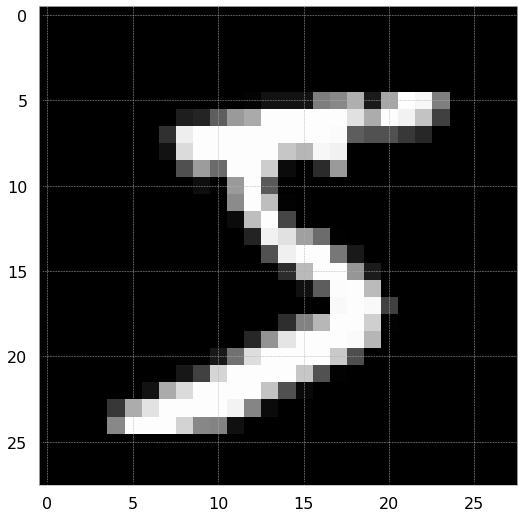

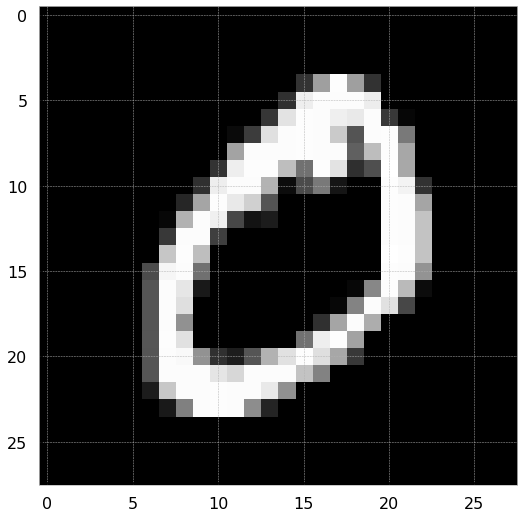

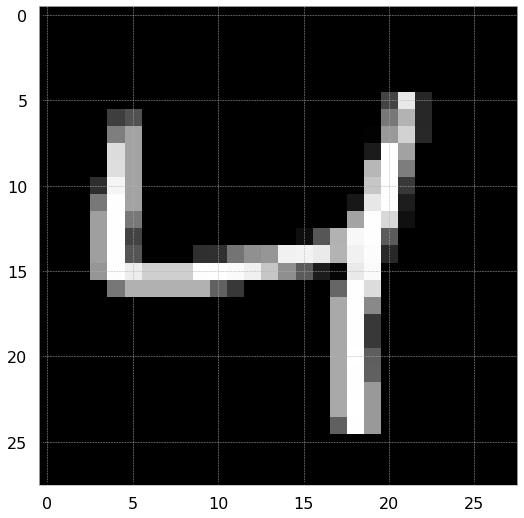

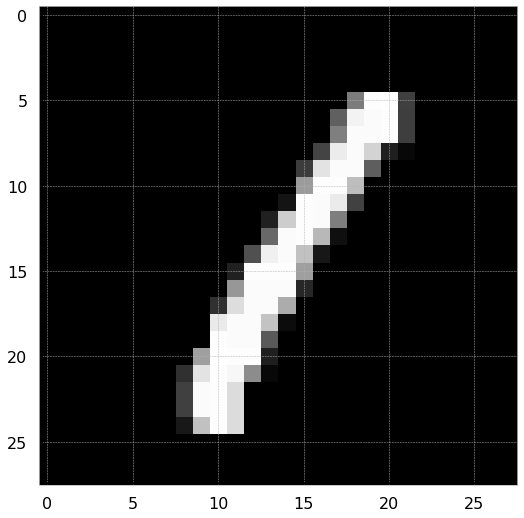

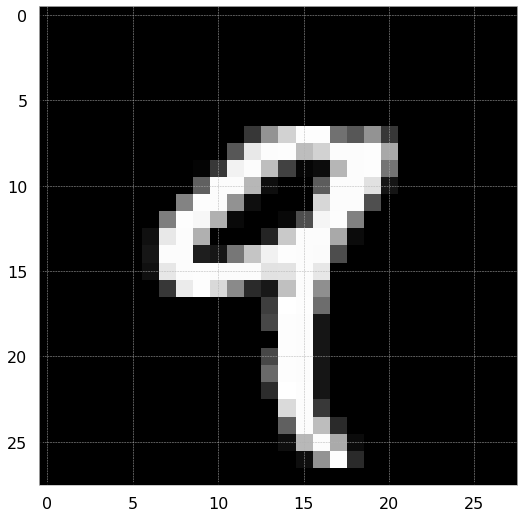

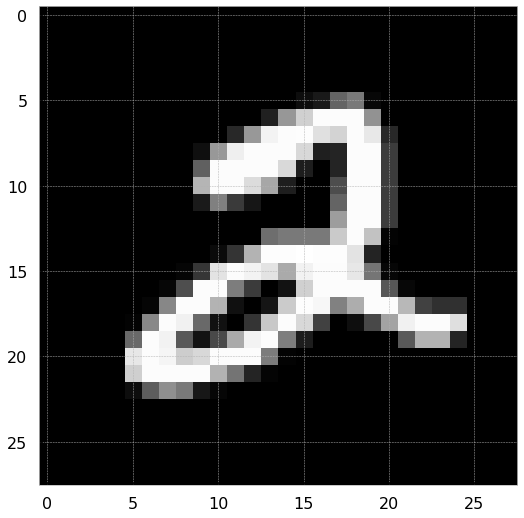

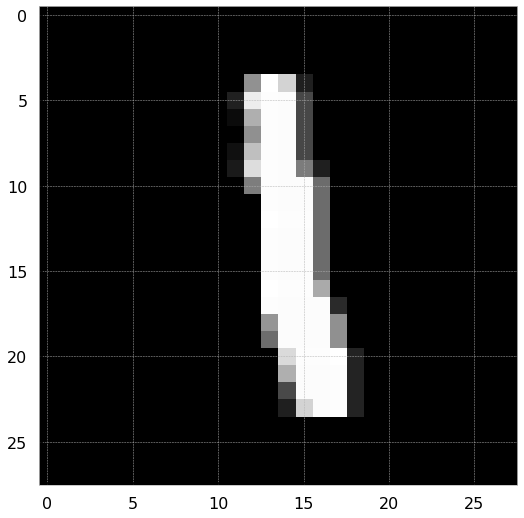

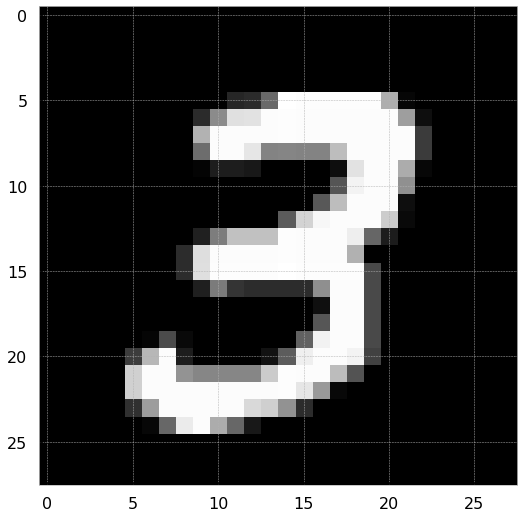

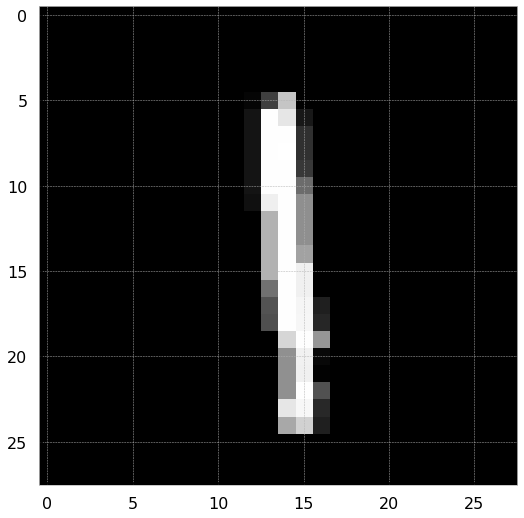

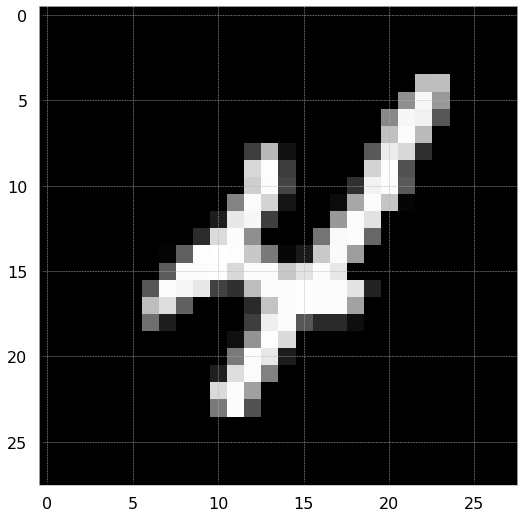

In [126]:
for i in range(10):
    
    sample = i
    image = X_train[sample]
    # plot the sample
    fig = plt.figure
    plt.imshow(image, cmap='gray')
    plt.show()

## One hot encoding for classes

In [9]:
y_train=tcg(y_train)
y_test=tcg(y_test)

## Reshaping the images to single channel values (Grayscale)

In [19]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

## CNN Model

In [23]:
model=Sequential()

In [24]:
model.add(Conv2D(32,(3,3),padding='same',input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPool2D((2,2),strides=2))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D((2,2),strides=2))

model.add(Conv2D(32,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D((2,2),strides=2))

model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_4 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_5 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 32)         

## Compiling the model with adam as optimizer (learning rate=0.0001) and accuracy as metrics

In [26]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])

## 50,000 Images for Trainning
## 10,000 Images for Validation
## 10,000 Images for Testing

In [29]:
history=model.fit(x=X_train[:50000],y=y_train[:50000],validation_data=(X_train[50000:],y_train[50000:]),epochs=5,batch_size=10)

Epoch 1/5
5000/5000 [==============================] - 37s 6ms/step - loss: 1.6362 - accuracy: 0.7666 - val_loss: 0.1813 - val_accuracy: 0.947221s - loss: 4.3541 - accuracy - ETA: 21s - loss: 4.1520 - accu - ETA: 20s - loss: 3.8905 - accuracy: 0 - ETA: 20s - loss - ETA: 18s - loss: - ETA: 16s - loss: 3.0571 - accuracy: 0. - ETA: 16s - loss: - ETA: 12s - loss: 2.4709 - accuracy: - ETA: 12s - loss: 2.4275 - accuracy:  - ETA: 11s - loss: 2.392 - ETA: 10s - loss: 2.2834 - accura - ETA - ETA: 6s - loss: 1.9684 - accuracy: 0.73 - ETA:  - ETA: 5s - E - ETA: 3s - loss: 1.7976  - ETA: 3s -
Epoch 2/5
5000/5000 [==============================] - 29s 6ms/step - loss: 0.1449 - accuracy: 0.9583 - val_loss: 0.1080 - val_accuracy: 0.96874s - loss: 0.1327 - accuracy: 0.95 - ETA: 24s - l - ETA: 22s - loss: 0.1456 - acc - ETA: 19s - loss: 0.1530 - acc - ETA: 19s - loss: 0.1531 -  - ETA: 18s - loss: 0.1531 - accurac - ETA: 15s - loss: 0.1527 -  - ETA: 14s  - ETA: 12s - loss: 0.1514  - ETA: 7s - loss: 0.14

In [30]:
history=pd.DataFrame(history.history)

## Comparing Accuracy and Validation Accuracy

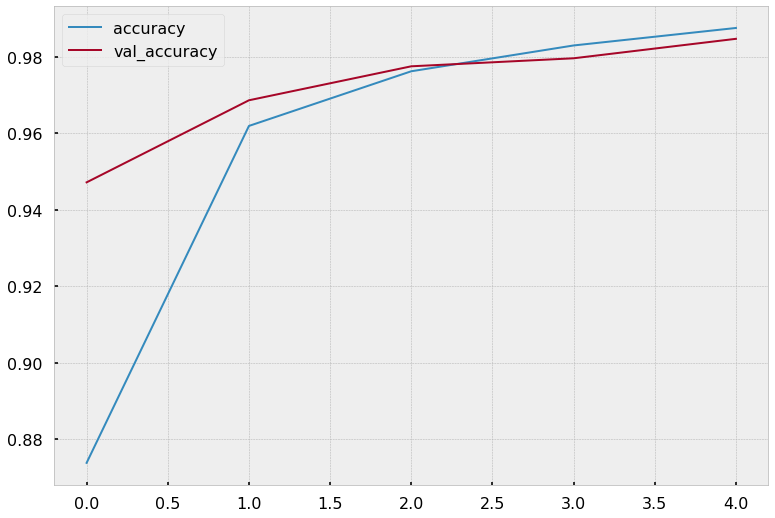

In [39]:
ax=history.accuracy.plot()
history.val_accuracy.plot(ax=ax)
ax.legend()

In [35]:
history

,loss,accuracy,val_loss,val_accuracy
0,0.617344,0.87372,0.181310,0.9472
1,0.131124,0.96198,0.108042,0.9687
2,0.078996,0.97630,0.082692,0.9776
3,0.055925,0.98306,0.075857,0.9797
4,0.039489,0.98764,0.061217,0.9848


## Accuracy on test batch

In [127]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 7ms/step - loss: 0.0560 - accuracy: 0.9830


[0.05604223161935806, 0.9829999804496765]

## Let's predict on custom made images of digits

In [40]:
from keras.preprocessing.image import load_img,img_to_array,array_to_img

In [119]:
img=load_img('4.png',color_mode='grayscale')

## The image is 4

In [120]:
img

In [121]:
img=img_to_array(img)

In [122]:
img=img.reshape(-1,28,28,1)

In [123]:
predict=model.predict(img)

In [124]:
np.argmax(predict,axis=-1)

array([4], dtype=int64)

In [125]:
model.save('mnist.h5')